# Twitter API - Analyzing tweets from NYTimes Health

In [3]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  

### Access to Twitter and search a userID

In [36]:
import tweepy
%run ./keys.py

auth=tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api= tweepy.API(auth)

### Create a DataFrame with all the information 

In [37]:
import pandas as pd

cursor= tweepy.Cursor(api.user_timeline, id="NYTHealth", tweet_mode="extended").items(50)

df = pd.DataFrame(t.__dict__ for t in cursor)

df

,_api,_json,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status
0,<tweepy.api.API object at 0x0000015C98F56AF0>,{'created_at': 'Thu Aug 26 15:06:52 +0000 2021...,2021-08-26 15:06:52,1430909617760989187,1430909617760989187,"Starting Nov. 1, any Delta employee who remain...",False,"[0, 162]","{'hashtags': [], 'symbols': [], 'user_mentions...",SocialFlow,...,None,None,False,3,6,False,False,False,en,NaN
1,<tweepy.api.API object at 0x0000015C98F56AF0>,{'created_at': 'Thu Aug 26 14:54:09 +0000 2021...,2021-08-26 14:54:09,1430906416173174799,1430906416173174799,Further delays could make it impossible to rec...,False,"[0, 151]","{'hashtags': [], 'symbols': [], 'user_mentions...",SocialFlow,...,None,None,False,1,3,False,False,False,en,NaN
2,<tweepy.api.API object at 0x0000015C98F56AF0>,{'created_at': 'Thu Aug 26 14:40:43 +0000 2021...,2021-08-26 14:40:43,1430903037988462597,1430903037988462597,Debates about mask and vaccine mandates loom o...,False,"[0, 92]","{'hashtags': [], 'symbols': [], 'user_mentions...",SocialFlow,...,None,None,False,1,2,False,False,False,en,NaN
3,<tweepy.api.API object at 0x0000015C98F56AF0>,{'created_at': 'Thu Aug 26 14:27:44 +0000 2021...,2021-08-26 14:27:44,1430899768771768326,1430899768771768326,A booster shot of the Johnson &amp; Johnson va...,False,"[0, 181]","{'hashtags': [], 'symbols': [], 'user_mentions...",SocialFlow,...,None,None,False,8,7,False,False,False,en,NaN
4,<tweepy.api.API object at 0x0000015C98F56AF0>,{'created_at': 'Thu Aug 26 14:13:26 +0000 2021...,2021-08-26 14:13:26,1430896171816341504,1430896171816341504,Pfizer said that a third shot of the vaccine s...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...",SocialFlow,...,None,None,False,11,23,False,False,False,en,NaN
5,<tweepy.api.API object at 0x0000015C98F56AF0>,{'created_at': 'Thu Aug 26 14:00:25 +0000 2021...,2021-08-26 14:00:25,1430892896127897605,1430892896127897605,The risk of heart inflammation is higher afte...,False,"[0, 149]","{'hashtags': [], 'symbols': [], 'user_mentions...",SocialFlow,...,None,None,False,17,29,False,False,False,en,NaN
6,<tweepy.api.API object at 0x0000015C98F56AF0>,{'created_at': 'Thu Aug 26 13:48:23 +0000 2021...,2021-08-26 13:48:23,1430889866078920705,1430889866078920705,As the Delta variant becomes dominant in the U...,False,"[0, 277]","{'hashtags': [], 'symbols': [], 'user_mentions...",SocialFlow,...,None,None,False,6,13,False,False,False,en,NaN
7,<tweepy.api.API object at 0x0000015C98F56AF0>,{'created_at': 'Thu Aug 26 02:38:40 +0000 2021...,2021-08-26 02:38:40,1430721328450088961,1430721328450088961,Diabetes screening for adults who are overweig...,False,"[0, 201]","{'hashtags': [], 'symbols': [], 'user_mentions...",SocialFlow,...,None,None,False,18,38,False,False,False,en,NaN
8,<tweepy.api.API object at 0x0000015C98F56AF0>,{'created_at': 'Thu Aug 26 02:23:06 +0000 2021...,2021-08-26 02:23:06,1430717410236145667,1430717410236145667,"Alina Chan, a scientist who raised questions a...",False,"[0, 117]","{'hashtags': [], 'symbols': [], 'user_mentions...",SocialFlow,...,None,None,False,3,8,False,False,False,en,NaN
9,<tweepy.api.API object at 0x0000015C98F56AF0>,{'created_at': 'Thu Aug 26 02:07:45 +0000 2021...,2021-08-26 02:07:45,1430713545860263936,1430713545860263936,The nation’s spy agencies have not yet conclud...,False,"[0, 167]","{'hashtags': [], 'symbols': [], 'user_mentions...",SocialFlow,...,None,None,False,1,5,False,False,False,en,NaN


### Select inly the Full text item from the last 50 tweets and overwrite a DataFrame

In [38]:
df=df.loc[:, "full_text"]
df


0     Starting Nov. 1, any Delta employee who remain...
1     Further delays could make it impossible to rec...
2     Debates about mask and vaccine mandates loom o...
3     A booster shot of the Johnson &amp; Johnson va...
4     Pfizer said that a third shot of the vaccine s...
5     The risk of  heart inflammation is higher afte...
6     As the Delta variant becomes dominant in the U...
7     Diabetes screening for adults who are overweig...
8     Alina Chan, a scientist who raised questions a...
9     The nation’s spy agencies have not yet conclud...
10    Starting Nov. 1, any Delta employee who remain...
11    Goldman Sachs told employees on Tuesday that i...
12    Further delays could make it impossible to rec...
13    Debates about mask and vaccine mandates loom o...
14    The ripple effects from the downfall of Theran...
15    A booster shot of the Johnson &amp; Johnson va...
16    Pfizer said that a third shot of the vaccine s...
17    The United States has a far higher share o

### Delete the Re-tweets so we can analyze only the NYTimes Health tweets

In [39]:
df1=df[~df.str.contains("RT")]
df1=df1.reset_index(drop=True)
df1

0     Starting Nov. 1, any Delta employee who remain...
1     Further delays could make it impossible to rec...
2     Debates about mask and vaccine mandates loom o...
3     A booster shot of the Johnson &amp; Johnson va...
4     Pfizer said that a third shot of the vaccine s...
5     The risk of  heart inflammation is higher afte...
6     As the Delta variant becomes dominant in the U...
7     Diabetes screening for adults who are overweig...
8     Alina Chan, a scientist who raised questions a...
9     The nation’s spy agencies have not yet conclud...
10    Starting Nov. 1, any Delta employee who remain...
11    Goldman Sachs told employees on Tuesday that i...
12    Further delays could make it impossible to rec...
13    Debates about mask and vaccine mandates loom o...
14    The ripple effects from the downfall of Theran...
15    A booster shot of the Johnson &amp; Johnson va...
16    Pfizer said that a third shot of the vaccine s...
17    The United States has a far higher share o

### This splits all the sentences up which makes it easier to work with

In [40]:
all_sentences = []

for word in df1:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['Starting', 'Nov.', '1,', 'any', 'Delta', 'employee', 'who', 'remains', 'unvaccinated', 'will', 'have', 'to', 'pay', 'an', 'additional', '$200', 'per', 'month', 'for', 'company’s', 'health', 'insurance.', 'https://t.co/FzKXZ7K8O6', 'Further', 'delays', 'could', 'make', 'it', 'impossible', 'to', 'recover', 'crucial', 'evidence', 'about', 'the', 'beginning', 'of', 'the', 'pandemic,', 'a', 'group', 'of', 'experts', 'say', 'https://t.co/uPUNqUuGNo', 'Debates', 'about', 'mask', 'and', 'vaccine', 'mandates', 'loom', 'over', 'the', 'fall', 'semester.', 'https://t.co/jpxTDdgIue', 'A', 'booster', 'shot', 'of', 'the', 'Johnson', '&amp;', 'Johnson', 'vaccine', 'dramatically', 'raises', 'the', 'levels', 'of', 'antibodies', 'against', 'the', 'coronavirus,', 'the', 'company', 'reported', 'on', 'Wednesday.', 'https://t.co/xizgUSyOvK', 'Pfizer', 'said', 'that', 'a', 'third', 'shot', 'of', 'the', 'vaccine', 'sharply', 'increased', 'the', 'levels', 'of', 'antibodies', 'against', 'the', 'virus.', 'https

### Removing Punctuation

In [41]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

lines2

['Starting',
 'Nov',
 '1',
 'any',
 'Delta',
 'employee',
 'who',
 'remains',
 'unvaccinated',
 'will',
 'have',
 'to',
 'pay',
 'an',
 'additional',
 '200',
 'per',
 'month',
 'for',
 'companys',
 'health',
 'insurance',
 'httpstcoFzKXZ7K8O6',
 'Further',
 'delays',
 'could',
 'make',
 'it',
 'impossible',
 'to',
 'recover',
 'crucial',
 'evidence',
 'about',
 'the',
 'beginning',
 'of',
 'the',
 'pandemic',
 'a',
 'group',
 'of',
 'experts',
 'say',
 'httpstcouPUNqUuGNo',
 'Debates',
 'about',
 'mask',
 'and',
 'vaccine',
 'mandates',
 'loom',
 'over',
 'the',
 'fall',
 'semester',
 'httpstcojpxTDdgIue',
 'A',
 'booster',
 'shot',
 'of',
 'the',
 'Johnson',
 'amp',
 'Johnson',
 'vaccine',
 'dramatically',
 'raises',
 'the',
 'levels',
 'of',
 'antibodies',
 'against',
 'the',
 'coronavirus',
 'the',
 'company',
 'reported',
 'on',
 'Wednesday',
 'httpstcoxizgUSyOvK',
 'Pfizer',
 'said',
 'that',
 'a',
 'third',
 'shot',
 'of',
 'the',
 'vaccine',
 'sharply',
 'increased',
 'the',
 'l

### Stemming the words to their root

In [31]:
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['debat',
 'about',
 'mask',
 'and',
 'vaccin',
 'mandat',
 'loom',
 'over',
 'the',
 'fall',
 'semest',
 'httpstcojpxtddgiu',
 'a',
 'booster',
 'shot',
 'of',
 'the',
 'johnson',
 'amp',
 'johnson',
 'vaccin',
 'dramat',
 'rais',
 'the',
 'level',
 'of',
 'antibodi',
 'against',
 'the',
 'coronavirus',
 'the',
 'compani',
 'report',
 'on',
 'wednesday',
 'httpstcoxizgusyovk',
 'pfizer',
 'said',
 'that',
 'a',
 'third',
 'shot',
 'of',
 'the',
 'vaccin',
 'sharpli',
 'increas',
 'the',
 'level',
 'of',
 'antibodi',
 'against',
 'the',
 'virus',
 'httpstcoqkyuuzpdyi',
 'the',
 'risk',
 'of',
 'heart',
 'inflamm',
 'is',
 'higher',
 'after',
 'coronavirus',
 'infect',
 'than',
 'after',
 'vaccin',
 'accord',
 'to',
 'a',
 'larg',
 'new',
 'studi',
 'httpstcoarj0jub4ij',
 'as',
 'the',
 'delta',
 'variant',
 'becom',
 'domin',
 'in',
 'the',
 'us',
 'rise',
 'number',
 'of',
 'breakthrough',
 'case',
 'are',
 'be',
 'report',
 'although',
 'most',
 'are',
 'mild',
 'the',
 'unvaccin',
 

### Removing all Stop Words

In [32]:
import nltk
nltk.download('stopwords')

stem2 = [word for word in stem if word not in stopwords.words("english")]

stem2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mirta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['debat',
 'mask',
 'vaccin',
 'mandat',
 'loom',
 'fall',
 'semest',
 'httpstcojpxtddgiu',
 'booster',
 'shot',
 'johnson',
 'amp',
 'johnson',
 'vaccin',
 'dramat',
 'rais',
 'level',
 'antibodi',
 'coronavirus',
 'compani',
 'report',
 'wednesday',
 'httpstcoxizgusyovk',
 'pfizer',
 'said',
 'third',
 'shot',
 'vaccin',
 'sharpli',
 'increas',
 'level',
 'antibodi',
 'virus',
 'httpstcoqkyuuzpdyi',
 'risk',
 'heart',
 'inflamm',
 'higher',
 'coronavirus',
 'infect',
 'vaccin',
 'accord',
 'larg',
 'new',
 'studi',
 'httpstcoarj0jub4ij',
 'delta',
 'variant',
 'becom',
 'domin',
 'us',
 'rise',
 'number',
 'breakthrough',
 'case',
 'report',
 'although',
 'mild',
 'unvaccin',
 'big',
 'highway',
 'transmiss',
 'one',
 'health',
 'expert',
 'note',
 'vaccin',
 'littl',
 'side',
 'street',
 'httpstcocdvifokntv',
 'diabet',
 'screen',
 'adult',
 'overweight',
 'start',
 'age',
 '35',
 'expert',
 'panel',
 'recommend',
 'could',
 'mean',
 'mani',
 '40',
 'percent',
 'american',
 'screen'

### Create a DataFrame with this new words

In [33]:
df1 = pd.DataFrame(stem2)

df1 = df1[0].value_counts()

In [34]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### This is a simple plot that shows the top 20 words being used

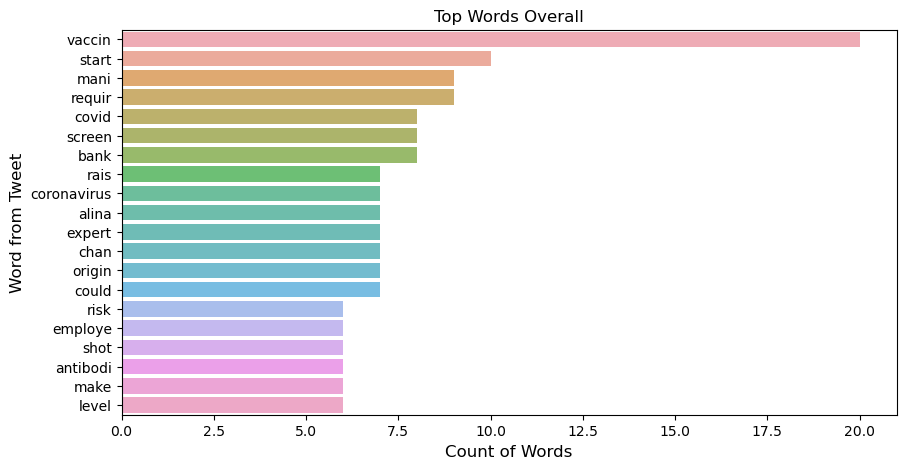

In [35]:
#df.plot(20)

df1 = df1[:20,]
plt.figure(figsize=(10,5))
sns.barplot(x=df1.values, y=df1.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

### Conclusion
### The word most used in the last 50 tweet from NYTHealth is: the stem word vaccin (vaccination, vaccines) and covid related words.